In [2]:
import sys
!{sys.executable} -m pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 KB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.0/98.0 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.2/149.2 KB 8.7 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
qtconsole 5.2.2 requires ipython-genutils, which is not installed.
jupyter 1.0.0 requires nbconvert, which is not installed.
jupyter 1.0.0 requires notebook, which is not installed.
You should consider upgrading via the '/opt/p

In [3]:
import pydicom
import matplotlib.pylab as plt
import os
import numpy as np

In [4]:
subjectNumber = '002'

subject_directory = '../Test Data/CA' + subjectNumber
volume_dicoms = os.listdir(subject_directory + '/Dicom/Vol/')
sac_dicoms = os.listdir(subject_directory + '/Dicom/Sac/')

dataset_vol = [None] * (len(volume_dicoms))
for dicom in volume_dicoms:
    slice_number = int(dicom.split('Slice')[1].split('.dcm')[0])
    dataset_vol[slice_number-1] = pydicom.dcmread(subject_directory + '/Dicom/Vol/'+dicom)
dataset_vol_volumes = [None] * (len(volume_dicoms))
for i in range(1, len(dataset_vol)-1):
    volumeArray = np.zeros((dataset_vol[i].pixel_array.shape[0],dataset_vol[i].pixel_array.shape[1],3))
    volumeArray[:,:,0] = dataset_vol[i-1].pixel_array
    volumeArray[:,:,1] = dataset_vol[i].pixel_array
    volumeArray[:,:,2] = dataset_vol[i+1].pixel_array
    dataset_vol_volumes[i] = volumeArray

dataset_sac = [None] * (len(sac_dicoms))
for dicom in sac_dicoms:
    slice_number = int(dicom.split('Slice')[1].split('.dcm')[0])
    dataset_sac[slice_number-1] = pydicom.dcmread(subject_directory + '/Dicom/Sac/'+dicom)
dataset_sac_volumes = [None] * (len(sac_dicoms))
for i in range(1, len(dataset_sac)-1):
    volumeArray = np.zeros((dataset_sac[i].pixel_array.shape[0],dataset_vol[i].pixel_array.shape[1],3))
    volumeArray[:,:,0] = dataset_sac[i-1].pixel_array
    volumeArray[:,:,1] = dataset_sac[i].pixel_array
    volumeArray[:,:,2] = dataset_sac[i+1].pixel_array
    dataset_sac_volumes[i] = volumeArray

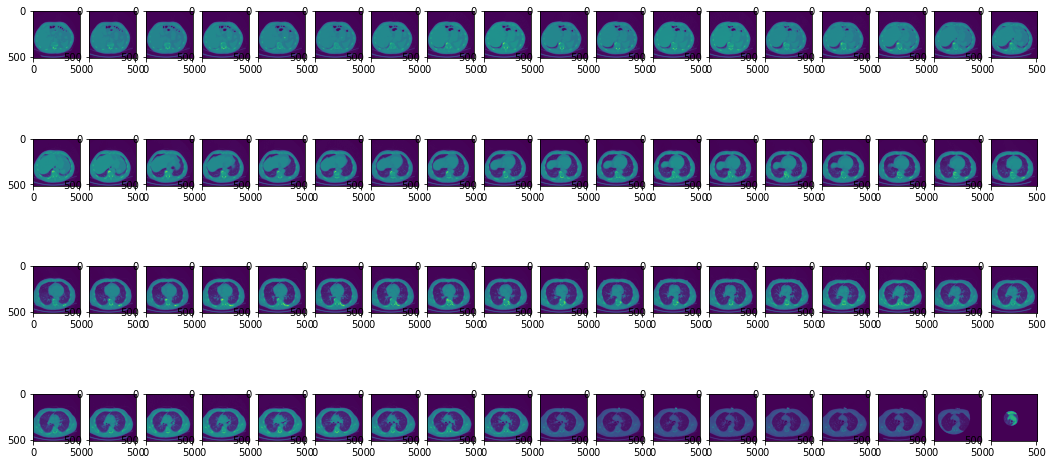

Bad pipe message: %s [b'o\xfe\x02\xd5\xf5g\xfe\xa0\xd6\x1cl\xad\x9f:m\\\xfb\xb8 \xed\xd3\xf8\xfe\xde8B\xdb\x9d9\x1c\xb1\xc8"\xaa\xf44\x0f\xd9@\xe1\xc9A\xcc\xeb\x89H\xc6hl\x16\x0c\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 \x03\x1e\xeb]\x01\x03\xcf\xfbo\xb1\xcc\x06\xfd!<i\xea.\tiz\x81\x1b\xda\x89\x12C\x83^1\x7f']
Bad pipe message: %s [b'X\xa4\xc5\x10\xd0\xf5\x8fg\xaf\xa9\xa6\x84\x80\xc5\xffd\x16\x0f \x08Z!\xcbO/\xd7W\x0b\x1ae\x86\xf2\x9b\xb3\x94\xa40tx\x9c\xe2P\xbd:\xda\xc7\xcc3']
Bad pipe message: %s [b"\xff\xfa|\xa3\xc7\x17\xb8\xffg#\x8e\x91\xcd\x7fA\xabX\xc3\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xc

In [5]:
plt.rcParams["figure.figsize"] = [18, 9]
for i in range(1, len(dataset_vol)):
    plt.subplot(4, int(len(dataset_vol)/4), i)
    plt.imshow(dataset_vol[i].pixel_array)

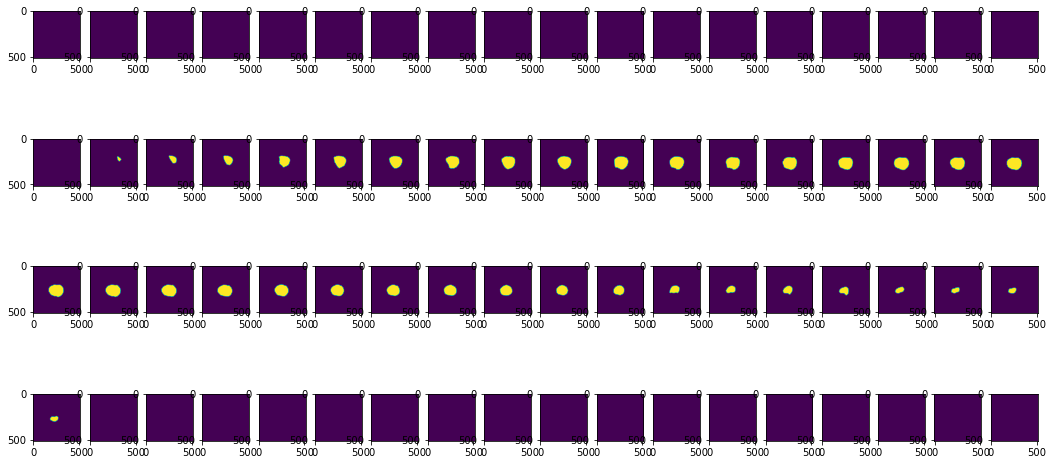

In [137]:
plt.rcParams["figure.figsize"] = [18, 9]
for i in range(1, len(dataset_sac)):
    plt.subplot(4, int(len(dataset_sac)/4), i)
    plt.imshow(dataset_sac[i].pixel_array)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


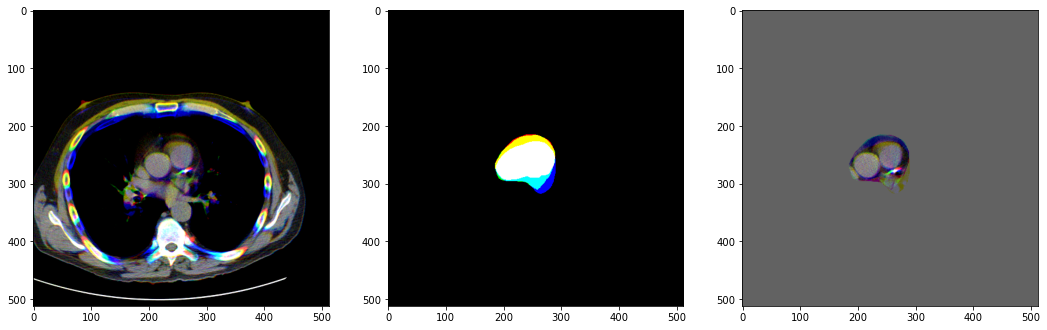

In [151]:
slice_number = 50
window = 350 # Window/Level from Hoori et al ("HU-attention-window with a window/level of 350/40 HU")
level = 40
combined = dataset_vol_volumes[slice_number] * dataset_sac_volumes[slice_number]

plt.subplot(1, 3, 1)
plt.imshow(((dataset_vol_volumes[slice_number]) - (level-window/2)) / window)

plt.subplot(1, 3, 2)
plt.imshow((dataset_sac_volumes[slice_number]))

plt.subplot(1, 3, 3)
plt.imshow((combined - (level-window/2)) / window)
